# Набор данных о курении и употреблении алкоголя с сигналом тела

## Подключение модулей

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [2]:
# Импортируем классификаторы
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [3]:
# вывод графиков здесь
%matplotlib inline

## Загрузка данных

In [4]:
# Загрузка данных
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


### Описание данных

Признаки:

Sex - пол мужской, женский

Age - округленно до 5 лет

Height - округленно до 5 см[см]

Weight [kg] - Вес [кг]

Waistline - Талия

Sight_left - левый глаз, насколько хорошо видит глаз, где идеальное зрение = 1,0

Sight_right - правый глаз, насколько хорошо видит глаз, где идеальное зрение = 1,0

Hear_left - слух слева, 1 (нормальный), 2 (ненормальный)

Hear_right - слух справа, 1 (нормальный), 2 (ненормальный)

SBP - систолическое артериальное давление [мм рт.ст.]

DBP - диастолическое артериальное давление [мм рт.ст.]

BLDS - уровень глюкозы в крови натощак или ФСГ [мг/дл]

Tot_chole - общий холестерин [мг/дл]

HDL_chole - холестерин высокой плотности (HDL) [мг/дл] - единственная фракция холестерина, которую называют "хорошим","полезным" холестерином.

LDL_chole - холестерин низкой плотности (LDL) [мг/дл]

Triglyceride -  триглицериды [мг/дл]

Hemoglobin - гемоглобин [г/дл]

Urine_protein - белок в моче., 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

Serum_creatinine - уровень креатинина в крови [мг/дл]

SGOT_AST - уровень глутамат-оксалоацетаттрансферазы (Глутамат-оксалоацетаттрансферазы) и АСТ(аспартаттрансферазы)[МЕ/л]

SGOT_ALT - АЛТ(аланиновая трансаминаза)[МЕ/л]

Gamma_GTP - y-глутамилтранспептидаза[МЕ/л]

SMK_stat_type_cd - Состояние курильщика, 1(никогда не курил), 2(раньше курил, но бросил), 3 (все еще курю)

DRK_YN - Пьющий или нет (Y-Да/N-Нет)

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- и др.


In [6]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(991346, 24)

В дата-сете почти миллион строк и 24 атрибута

In [7]:
# выводим типы данных
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

В основном данные имеют тип - float, но также присутствует int и object.

Целевой признак - DRK_YN

In [8]:
# Вывод информации о книге
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [9]:
# имена колонок в виде списка
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [10]:
# Выводим количесвто пропусков в каждом столбце
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке sex = 0
Кол-во пропусков в колонке age = 0
Кол-во пропусков в колонке height = 0
Кол-во пропусков в колонке weight = 0
Кол-во пропусков в колонке waistline = 0
Кол-во пропусков в колонке sight_left = 0
Кол-во пропусков в колонке sight_right = 0
Кол-во пропусков в колонке hear_left = 0
Кол-во пропусков в колонке hear_right = 0
Кол-во пропусков в колонке SBP = 0
Кол-во пропусков в колонке DBP = 0
Кол-во пропусков в колонке BLDS = 0
Кол-во пропусков в колонке tot_chole = 0
Кол-во пропусков в колонке HDL_chole = 0
Кол-во пропусков в колонке LDL_chole = 0
Кол-во пропусков в колонке triglyceride = 0
Кол-во пропусков в колонке hemoglobin = 0
Кол-во пропусков в колонке urine_protein = 0
Кол-во пропусков в колонке serum_creatinine = 0
Кол-во пропусков в колонке SGOT_AST = 0
Кол-во пропусков в колонке SGOT_ALT = 0
Кол-во пропусков в колонке gamma_GTP = 0
Кол-во пропусков в колонке SMK_stat_type_cd = 0
Кол-во пропусков в колонке DRK_YN = 0


In [11]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Дата-сет не имеет пропусков

In [12]:
# сколько уникальных значений в колонках? 
for col in df.columns:
    print("Количество уникальных значений в колонке %s = %d: " % (col, df[col].nunique()))

Количество уникальных значений в колонке sex = 2: 
Количество уникальных значений в колонке age = 14: 
Количество уникальных значений в колонке height = 13: 
Количество уникальных значений в колонке weight = 24: 
Количество уникальных значений в колонке waistline = 737: 
Количество уникальных значений в колонке sight_left = 24: 
Количество уникальных значений в колонке sight_right = 24: 
Количество уникальных значений в колонке hear_left = 2: 
Количество уникальных значений в колонке hear_right = 2: 
Количество уникальных значений в колонке SBP = 171: 
Количество уникальных значений в колонке DBP = 127: 
Количество уникальных значений в колонке BLDS = 498: 
Количество уникальных значений в колонке tot_chole = 474: 
Количество уникальных значений в колонке HDL_chole = 223: 
Количество уникальных значений в колонке LDL_chole = 432: 
Количество уникальных значений в колонке triglyceride = 1657: 
Количество уникальных значений в колонке hemoglobin = 190: 
Количество уникальных значений в к

Количество уникальных значений варьируется от 2 до 1657

In [13]:
# исследование целевого (target) признака - пьет ли пациент 
print('Кол-во уникальных значений в таргете: ', df['DRK_YN'].nunique())
print('перечень уникальных значений в таргете: ', df['DRK_YN'].unique())
print('статистика распределения значений в таргете: \n', df['DRK_YN'].value_counts(normalize=True))

Кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  ['Y' 'N']
статистика распределения значений в таргете: 
 DRK_YN
N    0.500187
Y    0.499813
Name: proportion, dtype: float64


Целевой признак имеет 2 значения: Y или N. N больше на 0,01

In [14]:
# описательная статистика для признака Age
df['age'].describe()

count    991346.000000
mean         47.614491
std          14.181339
min          20.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          85.000000
Name: age, dtype: float64

Минимальный возраст 20, а максимальный 85. Возраст имеет нормальное распределение

In [15]:
# описательная статистика для всех (числовых) признаков
df.describe(include='all')

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991346,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,526415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495858
mean,NaN,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,NaN
std,NaN,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,NaN
min,NaN,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,NaN
50%,NaN,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,NaN
75%,NaN,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,NaN


In [16]:
df['DBP'].describe()

count    991346.000000
mean         76.052627
std           9.889365
min          32.000000
25%          70.000000
50%          76.000000
75%          82.000000
max         185.000000
Name: DBP, dtype: float64

In [17]:
# Выводим оставшиеся столбцы
df['BLDS'].describe()

count    991346.000000
mean        100.424447
std          24.179960
min          25.000000
25%          88.000000
50%          96.000000
75%         105.000000
max         852.000000
Name: BLDS, dtype: float64

In [18]:
df['tot_chole'].describe()

count    991346.000000
mean        195.557020
std          38.660155
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: tot_chole, dtype: float64

In [19]:
df['HDL_chole'].describe()

count    991346.000000
mean         56.936800
std          17.238479
min           1.000000
25%          46.000000
50%          55.000000
75%          66.000000
max        8110.000000
Name: HDL_chole, dtype: float64

В основном люди имеют рост около 170 см и вес 70 кг.

Минимальное значение веса - 25 кг и это при минимальном возрасте в 20 лет. Также максимальное значение веса 140 кг, при максимальном росте в 190 см. Нормальный вес при росте 190 составляет около 75 кг.

Талия в 999 см и 8 см. 

Несколько значений систалического артериального давления имеют слишком высокие показатели. Такая же проблема прослеживается у диастолического артериального давления, уровня глюкозы в крови, холестерина и, в основном, у всех характеристик.

Будем считать, что это были неправильно введенные данные. 

У большинства людей хорошее зрение и слух. 

In [20]:
# Высчитываем дубликаты
df.duplicated().sum()

26

В дата сете найдены дубликаты.

In [21]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)
df.shape

(991320, 24)

Дубликаты удалены.

In [22]:
# Заменяем выбросы
df['waistline'] = np.where(df['waistline'] > 100 , df['waistline'].median(), df['waistline'])
df['waistline'] = np.where(df['waistline'] < 50 , df['waistline'].median(), df['waistline'])

df['HDL_chole'] = np.where(df['HDL_chole'] > 80, df['HDL_chole'].median(), df['HDL_chole'])
df['HDL_chole'] = np.where(df['HDL_chole'] < 30, df['HDL_chole'].median(), df['HDL_chole'])

df['LDL_chole'] = np.where(df['LDL_chole'] > 150, df['LDL_chole'].median(), df['LDL_chole'])
df['LDL_chole'] = np.where(df['LDL_chole'] < 75, df['LDL_chole'].median(), df['LDL_chole'])

df['triglyceride'] = np.where(df['triglyceride'] > 170, df['triglyceride'].median(), df['triglyceride'])
df['triglyceride'] = np.where(df['triglyceride'] < 65, df['triglyceride'].median(), df['triglyceride'])


df['SGOT_AST'] = np.where(df['SGOT_AST'] > 32, df['SGOT_AST'].median(), df['SGOT_AST'])
df['SGOT_AST'] = np.where(df['SGOT_AST'] < 15, df['SGOT_AST'].median(), df['SGOT_AST'])

df['SGOT_ALT'] = np.where(df['SGOT_ALT'] > 32, df['SGOT_ALT'].median(), df['SGOT_ALT'])
df['SGOT_ALT'] = np.where(df['SGOT_ALT'] < 10, df['SGOT_ALT'].median(), df['SGOT_ALT'])

df['gamma_GTP'] = np.where(df['gamma_GTP'] > 160, df['gamma_GTP'].median(), df['gamma_GTP'])
df['gamma_GTP'] = np.where(df['gamma_GTP'] < 20, df['gamma_GTP'].median(), df['gamma_GTP'])

df['weight'] = np.where(df['weight'] > 110, df['weight'].median(), df['weight'])
df['weight'] = np.where(df['weight'] < 40, df['weight'].median(), df['weight'])

df['hemoglobin'] = np.where(df['hemoglobin'] > 20, df['hemoglobin'].median(), df['hemoglobin'])
df['hemoglobin'] = np.where(df['hemoglobin'] < 5, df['hemoglobin'].median(), df['hemoglobin'])

df['serum_creatinine'] = np.where(df['serum_creatinine'] > 10, df['serum_creatinine'].median(), df['serum_creatinine'])
df['serum_creatinine'] = np.where(df['serum_creatinine'] < 0.5, df['serum_creatinine'].median(), df['serum_creatinine'])

df['SBP'] = np.where(df['SBP'] > 170, df['SBP'].median(), df['SBP'])
df['SBP'] = np.where(df['SBP'] < 98, df['SBP'].median(), df['SBP'])

df['DBP'] = np.where(df['DBP'] > 125, df['DBP'].median(), df['DBP'])
df['DBP'] = np.where(df['DBP'] < 45, df['DBP'].median(), df['DBP'])

df['BLDS'] = np.where(df['BLDS'] > 110, df['BLDS'].median(), df['BLDS'])
df['BLDS'] = np.where(df['BLDS'] < 60, df['BLDS'].median(), df['BLDS'])

Выбросы заменены на медианные значения

## Визуальный анализ

<Axes: xlabel='DRK_YN'>

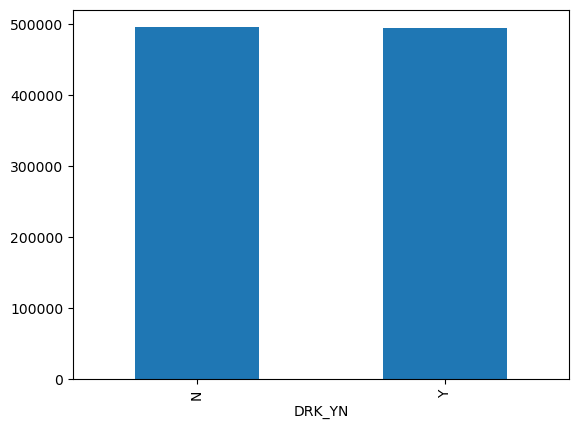

In [23]:
# Выводим соотношение значений в графике
df['DRK_YN'].value_counts(normalize=False).plot.bar()

In [24]:
# Общее соотношение значений
df['DRK_YN'].value_counts()

DRK_YN
N    495844
Y    495476
Name: count, dtype: int64

Пьющих и непьющих примерно одинаковое количество 

<Axes: >

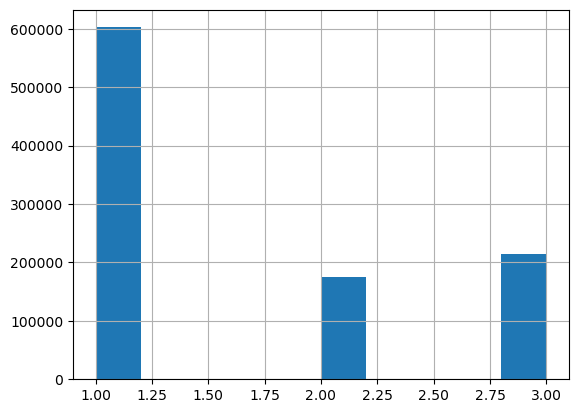

In [25]:
# Соотношение значений в столбце SMK_stat_type_cd
df['SMK_stat_type_cd'].hist(range=(1,3))

<Axes: ylabel='proportion'>

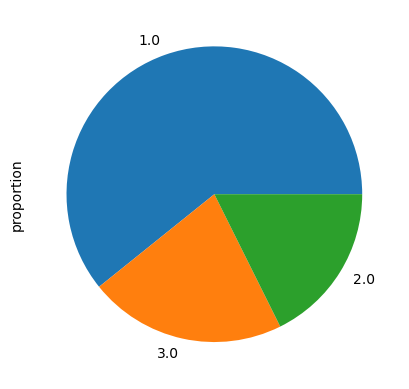

In [26]:
# Соотношение значений в столбце SMK_stat_type_cd
df['SMK_stat_type_cd'].value_counts(normalize=True).plot.pie()
# 1(никогда не курил), 2(раньше курил, но бросил), 3 (все еще курю)

Преобладающее значение имеют некурящие никогда люди

<Axes: ylabel='proportion'>

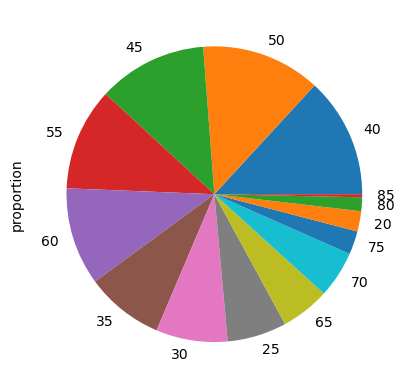

In [27]:
# Соотношение значений в столбце age
df['age'].value_counts(normalize=True).plot.pie()

In [28]:
# Количество уникальных значений в столбце age
df['age'].nunique()

14

In [29]:
# Вывод количесвта этих уникальных значений
df['age'].value_counts()

age
40    130381
50    129430
45    118353
55    111221
60    106062
35     84722
30     77598
25     64369
65     52957
70     50666
75     25332
20     21970
80     14968
85      3291
Name: count, dtype: int64

<Axes: ylabel='age'>

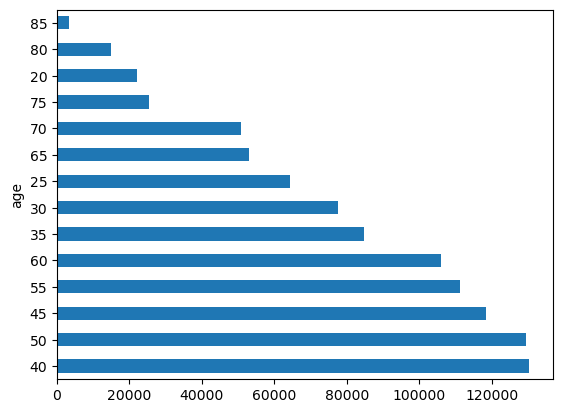

In [30]:
# Вывод в виде графика
df['age'].value_counts().plot.barh()

Пробладает рабочее поколение: от 45 до 55 лет. Максимальное значение - 85. 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>,
        <Axes: title={'center': 'sight_left'}>],
       [<Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'DBP'}>],
       [<Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>,
        <Axes: title={'center': 'SGOT_ALT'}>],
       [<Axes: title={'center': 'gamma_GTP'}>,
        <Axes: title={'center

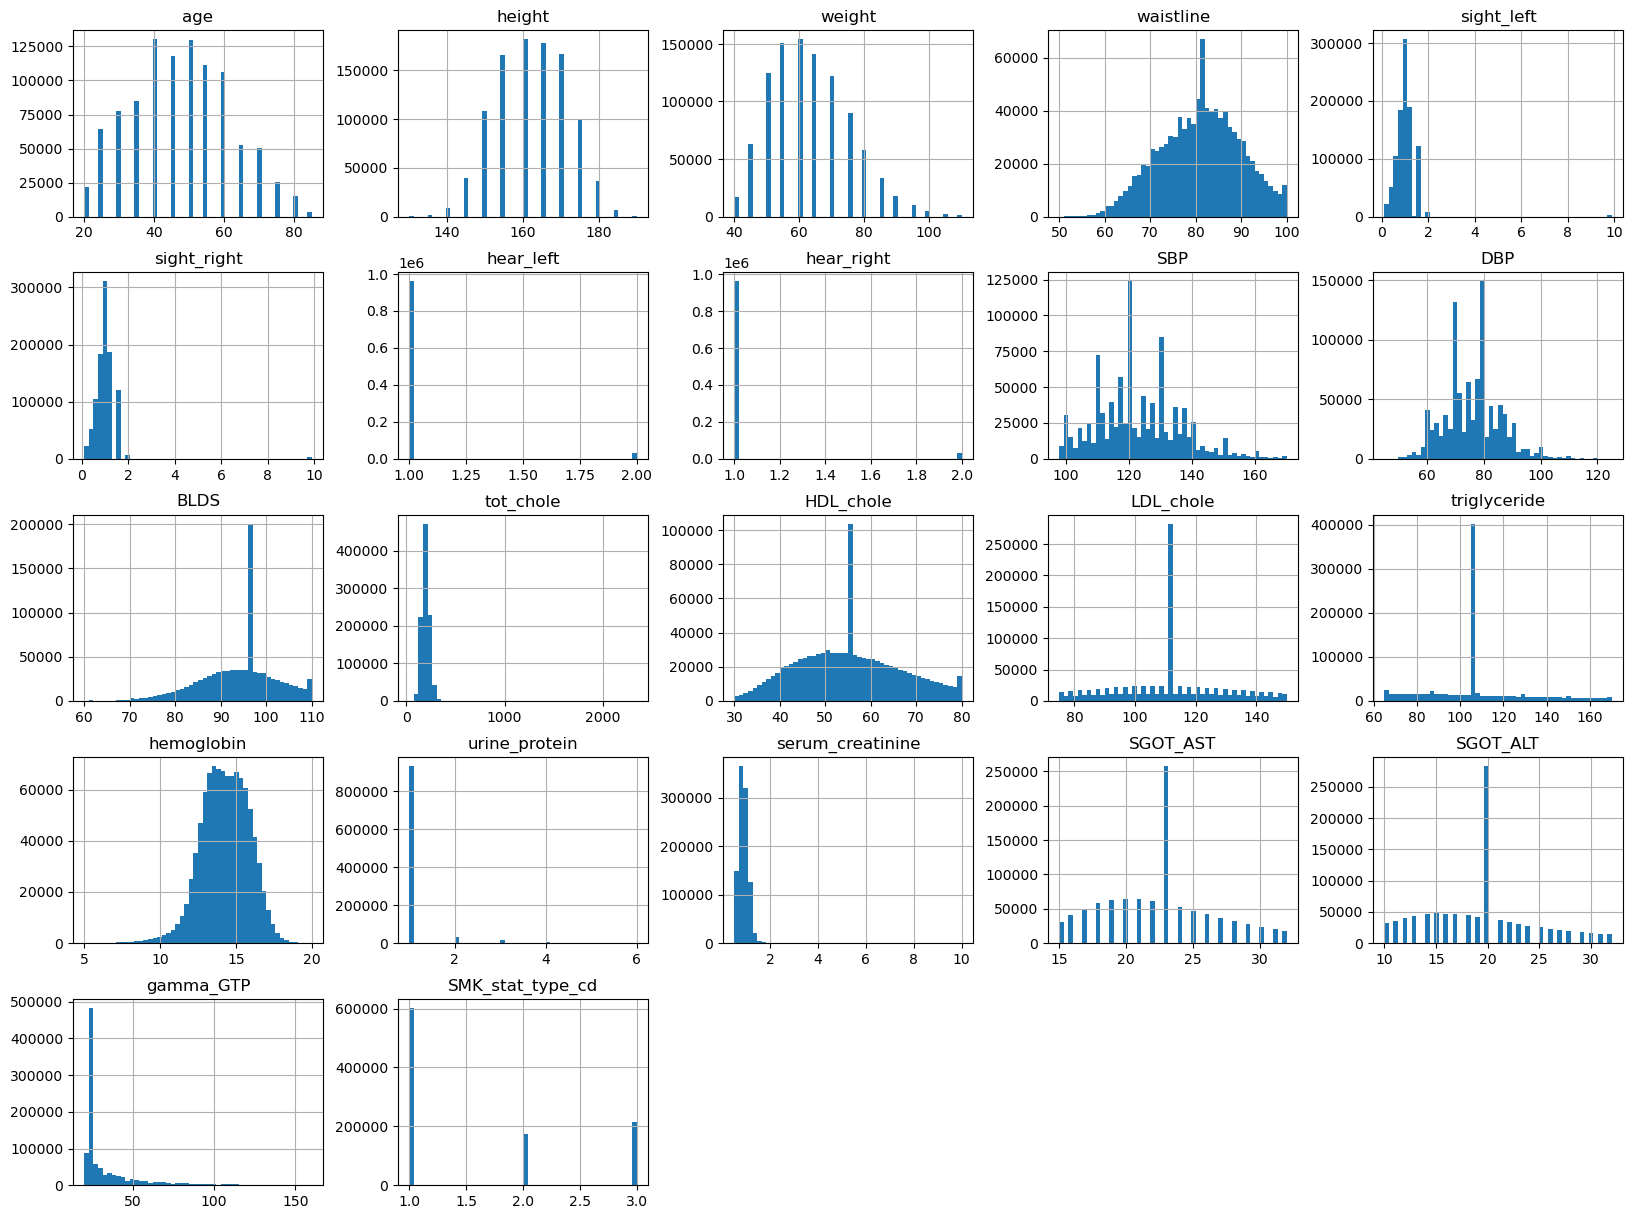

In [31]:
# гистаграммы всех признаков
df.hist(figsize = (20,15), bins = 50)

Значения более менее нормально распределены, но были замечены большие отклонения, но было решено их оставить, так как это часто встречающиеся значения.

<Axes: >

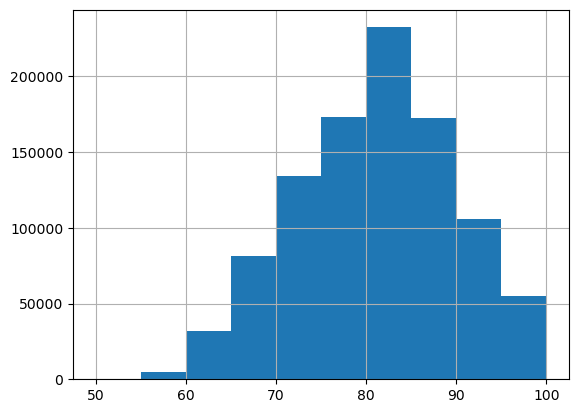

In [32]:
# Гистограмма waistline в определенном промежутке
df['waistline'].hist(range=(50,100))

В основном значения waistline распределено в промежутке от 5 до 100.

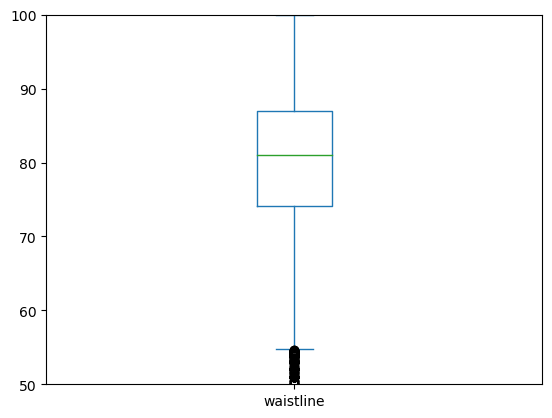

In [33]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['waistline'].plot.box()
plt.ylim(50, 100) # устанавливаем границы оси Y
plt.show() 

По "ящику с усами" понятно, что у нас есть выбросы, но эти значения вполне нормальные и могут присутствовать в датасете.

<Axes: ylabel='Density'>

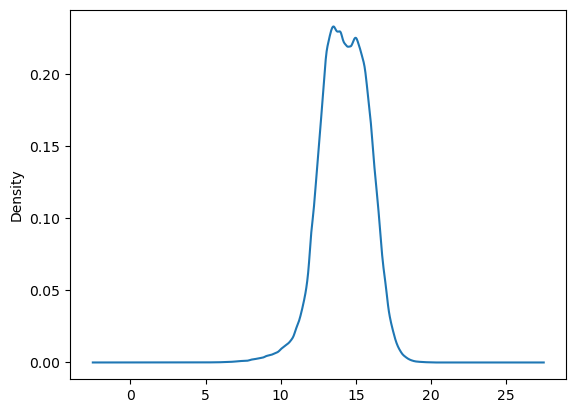

In [34]:
# график плотности распределения признака
df['hemoglobin'].plot.density()

In [35]:
# список признаков для анализа
features_eda = ['age', 'sex', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 
                  'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride',
                'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST' ,'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd',
                'DRK_YN']

In [36]:
# Меняем значение 2-значных характеристик на 0 и 1
df['sex']= df['sex'].map({'Male':0, 'Female':1})
df['DRK_YN']= df['DRK_YN'].map({'Y':0, 'N':1})

In [37]:
# матрица коррелаций в виде таблицы
corr = df[features_eda].corr()
corr

,age,sex,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
age,1.000000,0.083225,-0.398501,-0.188248,0.189434,-0.172098,-0.167682,0.203023,0.198698,0.260460,...,0.046942,0.070883,-0.173336,0.041489,0.043657,0.166685,0.074890,-0.010490,-0.126028,0.284586
sex,0.083225,1.000000,-0.722774,-0.581573,-0.434937,-0.099019,-0.101522,-0.002927,0.000756,-0.156220,...,-0.025425,-0.104254,-0.670055,-0.020182,-0.456865,-0.159633,-0.262463,-0.301465,-0.590998,0.368721
height,-0.398501,-0.722774,1.000000,0.662801,0.311720,0.139142,0.138527,-0.081159,-0.082469,0.022002,...,0.002151,0.047596,0.532463,0.002290,0.316729,0.039650,0.152224,0.207062,0.467306,-0.374560
weight,-0.188248,-0.581573,0.662801,1.000000,0.711829,0.087951,0.087754,-0.042142,-0.043290,0.226223,...,0.064585,0.144901,0.497786,0.028733,0.287435,0.135353,0.271233,0.307565,0.365912,-0.263160
waistline,0.189434,-0.434937,0.311720,0.711829,1.000000,0.003465,0.005774,0.044793,0.042499,0.304819,...,0.080854,0.179394,0.361131,0.039989,0.233883,0.179987,0.290702,0.279690,0.255407,-0.118700
sight_left,-0.172098,-0.099019,0.139142,0.087951,0.003465,1.000000,0.307981,-0.039428,-0.041003,-0.036770,...,-0.000125,-0.001865,0.086225,-0.010256,0.035620,-0.014521,0.012132,0.026498,0.064196,-0.077373
sight_right,-0.167682,-0.101522,0.138527,0.087754,0.005774,0.307981,1.000000,-0.040764,-0.038901,-0.034911,...,-0.000981,-0.000892,0.087175,-0.010900,0.037185,-0.014191,0.011155,0.028032,0.065050,-0.074798
hear_left,0.203023,-0.002927,-0.081159,-0.042142,0.044793,-0.039428,-0.040764,1.000000,0.536899,0.055605,...,-0.003558,0.010788,-0.036073,0.019756,0.028618,0.029833,0.001565,-0.005291,-0.021244,0.058338
hear_right,0.198698,0.000756,-0.082469,-0.043290,0.042499,-0.041003,-0.038901,0.536899,1.000000,0.056620,...,-0.004383,0.009448,-0.036740,0.018240,0.025255,0.029289,0.002050,-0.006582,-0.022339,0.058238
SBP,0.260460,-0.156220,0.022002,0.226223,0.304819,-0.036770,-0.034911,0.055605,0.056620,1.000000,...,0.032245,0.098958,0.147477,0.057522,0.099911,0.130676,0.137917,0.164236,0.073511,-0.026831


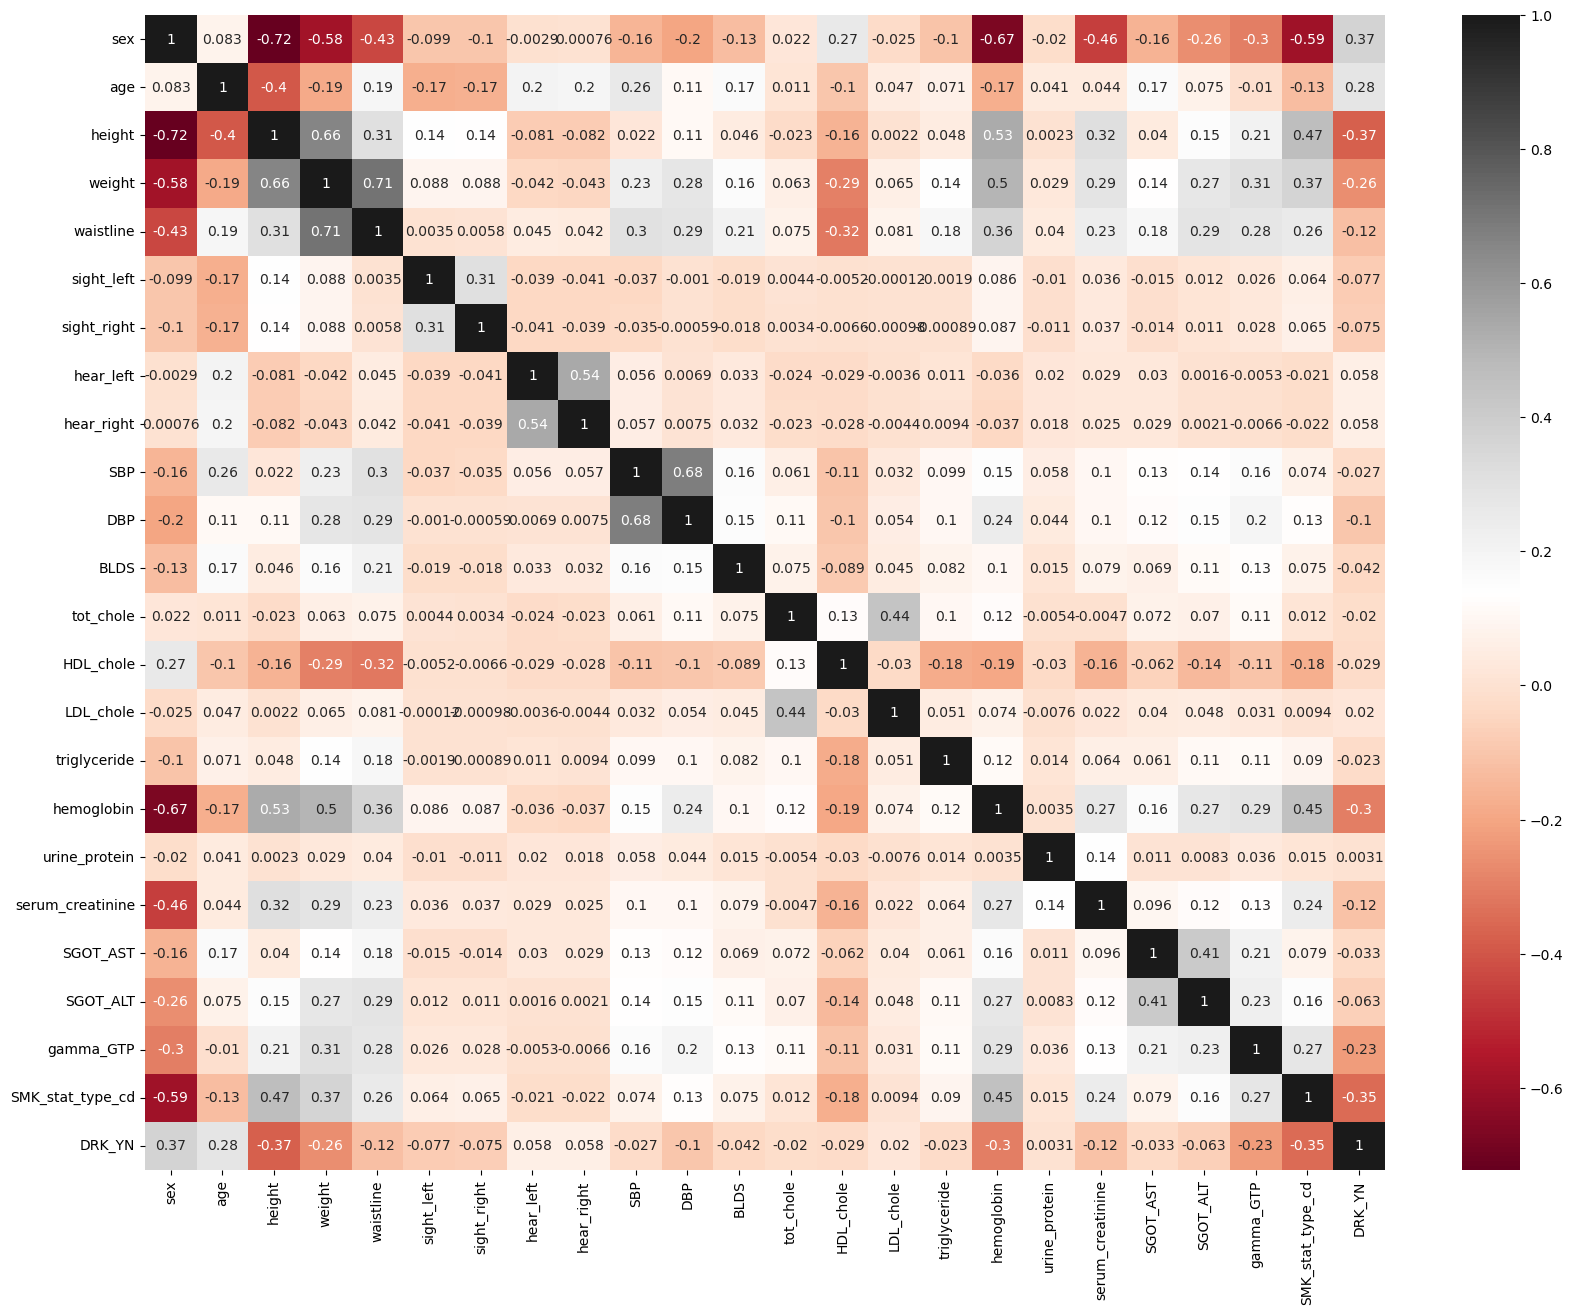

In [38]:
# матрица коррелаций в виде графика
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap = 'RdGy',annot = True,cbar=True);

С помощью корреляции можно заметить, что большее значение на целевую переменную имеет пол и возраст. Сильная зависимость замечена между LDL_chole и tot_chole, hemoglobin и weight, SBP и DBP и т.д.

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Формирование дата-сета для обучения моделей

In [39]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['DRK_YN']

In [40]:
# Копируем датасет
del df['DRK_YN']
X = df.copy()

In [41]:
# Разделяем выборку на обучающую и тестовую 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(664184, 23) (327136, 23) (664184,) (327136,)


In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(664184, 23) (327136, 23) (664184,) (327136,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [43]:
# Методом ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
# Делаем предсказание на основе тестовой выборки
knn_test_pred = knn.predict(X_test)

In [45]:
# Делаем предсказание на основе тренировочной выборки
knn_train_pred = knn.predict(X_train)

In [46]:
# Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66    163428
           1       0.66      0.65      0.66    163708

    accuracy                           0.66    327136
   macro avg       0.66      0.66      0.66    327136
weighted avg       0.66      0.66      0.66    327136



In [47]:
# Выводм долю верных предсказаний тренеровочной и тестовой выборки. 
print('train accuracy: ', accuracy_score(y_train, knn_train_pred, normalize=True))
print('test accuracy: ', accuracy_score(y_test, knn_test_pred, normalize=True))

train accuracy:  0.7689450513713068
test accuracy:  0.6615902866086276


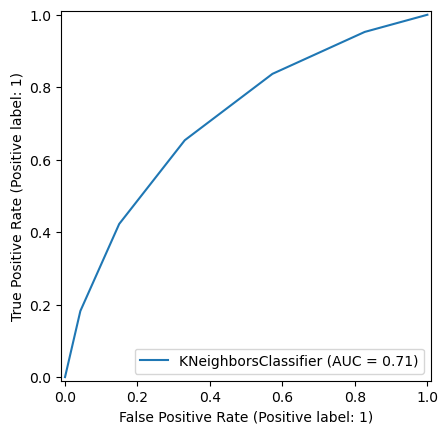

In [48]:
# Выводим кривую
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Кривая имеет хороший показатель 0, 71

Доля верных ответов относительна хороша и точность предсказаний выше 50%

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [49]:
# метод Гаусса
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
# Делаем предсказание на основе тестовой выборки
gnb_test_pred = knn.predict(X_test)

In [51]:
# Делаем предсказание на основе тренировочной выборки
gnb_train_pred = knn.predict(X_train)

In [52]:
# Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, gnb_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66    163428
           1       0.66      0.65      0.66    163708

    accuracy                           0.66    327136
   macro avg       0.66      0.66      0.66    327136
weighted avg       0.66      0.66      0.66    327136



In [53]:
# Выводм долю верных предсказаний тренеровочной и тестовой выборки. 
print('train accuracy: ', accuracy_score(y_train, gnb_train_pred, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_test_pred, normalize=True))

train accuracy:  0.7689450513713068
test accuracy:  0.6615902866086276


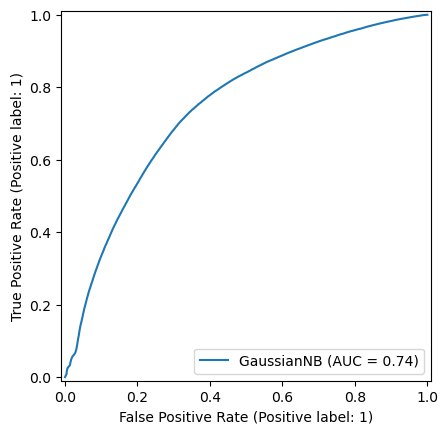

In [54]:
# Выводим кривую
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Кривая имеет хороший показатель - 0,74

Показатели этой модели идентичны предыдущей

### Random Forest Classifier (Классификатор дерева решений)

In [55]:
# Классификатор дерева решений
rfc  = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
# Делаем предсказание на основе тестовой выборки
rfc_test_pred = rfc.predict(X_test)

In [57]:
# Делаем предсказание на основе тренировочной выборки
rfc_train_pred = rfc.predict(X_train)

In [58]:
# Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73    163428
           1       0.74      0.70      0.72    163708

    accuracy                           0.72    327136
   macro avg       0.73      0.72      0.72    327136
weighted avg       0.73      0.72      0.72    327136



In [59]:
# Выводм долю верных предсказаний тренеровочной и тестовой выборки. 
print('train accuracy: ', accuracy_score(y_train, rfc_train_pred, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_test_pred, normalize=True))

train accuracy:  0.9999909663587199
test accuracy:  0.7248575515993348


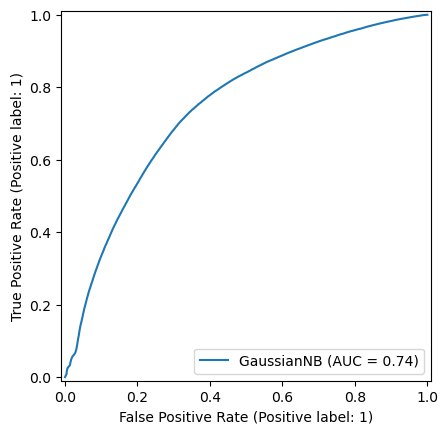

In [60]:
# Выводим кривую
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Кривая имеет хороший показатель - 0,74

Доля верных ответов на тренировочной выборке почти 1, а при тестовой 71, что очень хорошо. Точность предсказаний выше 70%.

Это модель обучилась лучше всего, поэтому мы будем в дальнейшем использовать ее.

## Гипперпараметры

In [ ]:
# Определяем оптимальное количество деревьев
param_grid = {'n_estimators': [20, 50, 100]}
rfc_gs = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=rfc_gs, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best Parameters: ", grid_search.best_params_)

In [ ]:
rfc_gs = RandomForestClassifier(n_estimators=20)
rfc_gs.fit(X_train, y_train)

In [ ]:
y_pred = rfc_gs.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Вывод

Мы просмотрели данные по зависимым от алкоголя и курения людям, заменили выбросы на более подходящие значения, проанализировали данные и на основе уже обработанных данных провели обучение модели 3 классификаторами и вывели их кривую.